# Convolutional Neural Networks

In [1]:
# TensorFlow and tf.keras 
import tensorflow as tf 
from tensorflow import keras

train_path = 'Training_data'
valid_path = 'Testing_data'

2022-10-23 18:29:22.471207: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Defining the model

no.of filters/kernel is equal to no.of feature maps

kernel_size = 3 means 3x3 matrix

relu activation function is used when there are - values, can convert - values into 0

input_shape = (300,300,3) means 300x300 pixels with 3 for rgb 

by flatten function it will convert the 3d output to 1d

In [2]:
model = tf.keras.models.Sequential([
    # note the input shape is desired size of the image 300x300 with 3 bytes colour
    # this is first convolution
    tf.keras.layers.Conv2D(filters=16,kernel_size=3,activation='relu',input_shape=(300,300,3)),
    tf.keras.layers.MaxPool2D(2,2),
    # the second convolution
    tf.keras.layers.Conv2D(filters=16,kernel_size=3,activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    # third convolution
    tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    # fourth convolution
    tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    # fifth convolution
    tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    # flatten the results to feed the DNN
    tf.keras.layers.Flatten(),
    # 512 hidden layer
    tf.keras.layers.Dense(512,activation='relu'),
    # only 1 output neuron, It will contain a value from 0-1 where 0 for 1 class ('cat') and 1 for other ('dog')
    tf.keras.layers.Dense(1,activation='sigmoid')
])

2022-10-23 18:29:28.473983: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## summary

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 16)      2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 32)        4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 32)       0

## compiling the model

since there is two outputs binary_crossentropy is used 

if there are 3 or more values categorical_crossentropy

learning rate is amount of change to the model in each step

low learning rate will take a long time to find the best set of parameters
high learning rate will take a less time by only finding best possible 

In [4]:
from keras.optimizers import RMSprop

model.compile(  loss = 'binary_crossentropy',
                optimizer = RMSprop(learning_rate=0.001),
                metrics = ['accuracy']
)

## Train the model from generators

In [5]:
from keras.preprocessing.image import ImageDataGenerator

# All train images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale = 1./255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory( # source directory for training images
                                                    train_path,
                                                    # all images will be resized to 150x150
                                                    target_size = (300,300),
                                                    batch_size = 32,
                                                    # since we use binary_crossentropy we need binary labels
                                                    class_mode = 'binary')

# All train images will be rescaled by 1./255
test_datagen = ImageDataGenerator(rescale = 1./255)

# apply predefined specification to test dataset
test_set = test_datagen.flow_from_directory( valid_path,
                                            target_size = (300,300),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 633 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [6]:
# large epochs number is highly trainable model with minimum error
# steps per epoch is taken by dividing the batch_size by epochs
# since there is two datasets two epochs were taken
history = model.fit(
    train_generator,
    validation_data=test_set,
    steps_per_epoch=8,
    epochs=2
)

Epoch 1/2
8/8 [==============================] - ETA: 0s - loss: 1.3170 - accuracy: 0.5820

## Plot variation in loss and accuracy

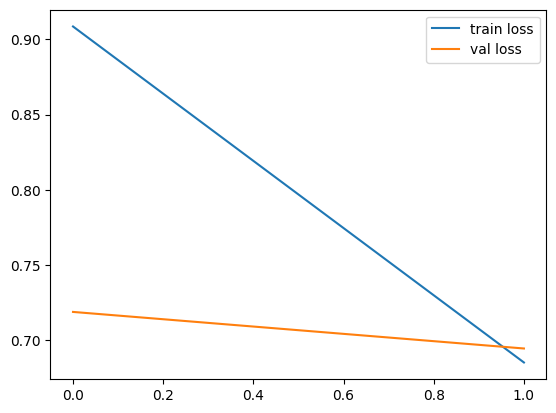

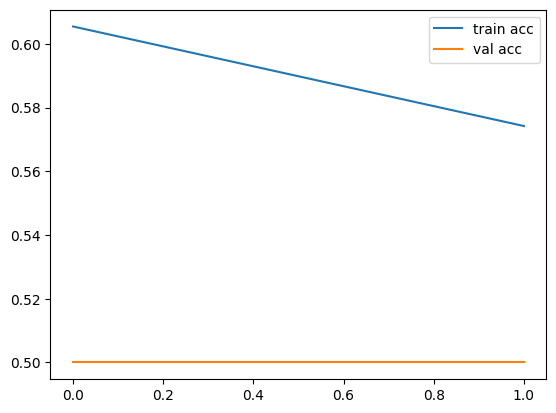

<Figure size 640x480 with 0 Axes>

In [ ]:
# save weights for future predictions
model.save_weights('first_try.h5')

import matplotlib.pyplot as plt

# Plot the loss
plt.plot(history.history['loss'], label = 'train loss')
plt.plot(history.history['val_loss'], label = 'val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# Plot the accuracy
plt.plot(history.history['accuracy'], label = 'train acc')
plt.plot(history.history['val_accuracy'], label = 'val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')